# UTS PENDAT

## Soalnya :
 ### 1. Data  data dari  https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1

 Tahapan analisa (seperti proses yang telah dilakukan pada tugas kelompok)

 - Pemahaman Data ( data understanding)
 - Pemrosesan awal data (Preprocessing ) jika diperlukan
 - Pemodelan (model klasifikasi)







## Jawaban

### Pemahaman Data ( data understanding) :

Pemahaman data (data understanding) adalah langkah pertama dalam proses analisis data atau pembelajaran mesin, di mana kita mempelajari dan mengidentifikasi karakteristik serta isi dari dataset yang akan digunakan.

In [1]:
import pandas as pd
df = pd.read_csv("cirrhosis.csv")

In [2]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv("cirrhosis.csv")

# Menampilkan 5 baris pertama
print("📌 5 Data Teratas:")
print(df.head())

# Struktur kolom dan tipe data
print("\n📌 Struktur Data:")
print(df.info())

# Statistik ringkasan untuk kolom numerik & kategorikal
print("\n📌 Statistik Deskriptif:")
print(df.describe(include='all'))

# Cek jumlah nilai yang hilang di setiap kolom
print("\n📌 Jumlah Nilai Hilang:")
print(df.isnull().sum())

📌 5 Data Teratas:
   ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      19

### Pemrosesan awal data (Preprocessing
Tahapan ini adalah saat kita menyiapkan data agar bisa diproses oleh algoritma machine learning.

In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("cirrhosis.csv")

# 1. Hapus kolom yang tidak relevan (ID)
df = df.drop(columns=["ID"])

# 2. Identifikasi kolom numerik dan kategorikal
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# 3. Imputasi (mengisi) nilai hilang

# Untuk kolom numerik → isi dengan median
num_imputer = SimpleImputer(strategy="median")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Untuk kolom kategorikal → isi dengan modus (nilai terbanyak)
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# 4. Encoding data kategorikal (ubah ke angka)
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. Tampilkan data hasil preprocessing
print("Data setelah preprocessing:")
print(df.head())

Data setelah preprocessing:
   N_Days  Status  Drug      Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0   400.0       2     0  21464.0    0        1             1        1      2   
1  4500.0       0     0  20617.0    0        0             1        1      0   
2  1012.0       2     0  25594.0    1        0             0        0      1   
3  1925.0       2     0  19994.0    0        0             1        1      1   
4  1504.0       1     1  13918.0    0        0             1        1      0   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0       14.5        261.0     2.60   156.0    1718.0  137.95          172.0   
1        1.1        302.0     4.14    54.0    7394.8  113.52           88.0   
2        1.4        176.0     3.48   210.0     516.0   96.10           55.0   
3        1.8        244.0     2.54    64.0    6121.8   60.63           92.0   
4        3.4        279.0     3.53   143.0     671.0  113.15           72.0   

   Platelets  Pr

### Pemodelan (model klasifikasi)
Pemodelan adalah inti dari proses machine learning, di mana kita mengajarkan komputer untuk belajar dari data. Model akan mempelajari pola dari data latih dan digunakan untuk membuat prediksi terhadap data baru.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["Status"])
y = df["Status"]

# Split data jadi data latih dan uji (80%:20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model-model
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Latih dan evaluasi tiap model
for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)               # Training
    y_pred = model.predict(X_test)            # Prediksi
    acc = accuracy_score(y_test, y_pred)      # Akurasi
    print(f"Akurasi: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Model: Random Forest
Akurasi: 0.7738
Classification Report:


C:\Users\Vania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        44
           1       0.00      0.00      0.00         4
           2       0.79      0.75      0.77        36

    accuracy                           0.77        84
   macro avg       0.52      0.54      0.53        84
weighted avg       0.74      0.77      0.75        84


Model: Decision Tree
Akurasi: 0.6429
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        44
           1       0.00      0.00      0.00         4
           2       0.59      0.61      0.60        36

    accuracy                           0.64        84
   macro avg       0.44      0.45      0.44        84
weighted avg       0.63      0.64      0.63        84


Model: Logistic Regression


C:\Users\Vania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.p

Akurasi: 0.7976
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        44
           1       0.00      0.00      0.00         4
           2       0.78      0.86      0.82        36

    accuracy                           0.80        84
   macro avg       0.53      0.56      0.54        84
weighted avg       0.76      0.80      0.78        84


Model: K-Nearest Neighbors


Akurasi: 0.6905
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        44
           1       0.00      0.00      0.00         4
           2       0.72      0.64      0.68        36

    accuracy                           0.69        84
   macro avg       0.46      0.48      0.47        84
weighted avg       0.66      0.69      0.67        84



C:\Users\Vania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Evaluasi
Evaluasi adalah proses untuk mengetahui seberapa baik kinerja model dalam melakukan prediksi. Caranya yaitu dengan membandingkan hasil prediksi model dengan data asli (jawaban sebenarnya). Dari sini kita bisa tahu apakah model sudah akurat atau masih perlu diperbaiki.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi


Random Forest Accuracy: 0.7738
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        44
           1       0.00      0.00      0.00         4
           2       0.79      0.75      0.77        36

    accuracy                           0.77        84
   macro avg       0.52      0.54      0.53        84
weighted avg       0.74      0.77      0.75        84


Decision Tree Accuracy: 0.6429
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        44
           1       0.00      0.00      0.00         4
           2       0.59      0.61      0.60        36

    accuracy                           0.64        84
   macro avg       0.44      0.45      0.44        84
weighted avg       0.63      0.64      0.63        84



C:\Users\Vania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Logistic Regression Accuracy: 0.7976
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        44
           1       0.00      0.00      0.00         4
           2       0.78      0.86      0.82        36

    accuracy                           0.80        84
   macro avg       0.53      0.56      0.54        84
weighted avg       0.76      0.80      0.78        84


K-Nearest Neighbors Accuracy: 0.6905
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        44
           1       0.00      0.00      0.00         4
           2       0.72      0.64      0.68        36

    accuracy                           0.69        84
   macro avg       0.46      0.48      0.47        84
weighted avg       0.66      0.69      0.67        84



C:\Users\Vania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.p

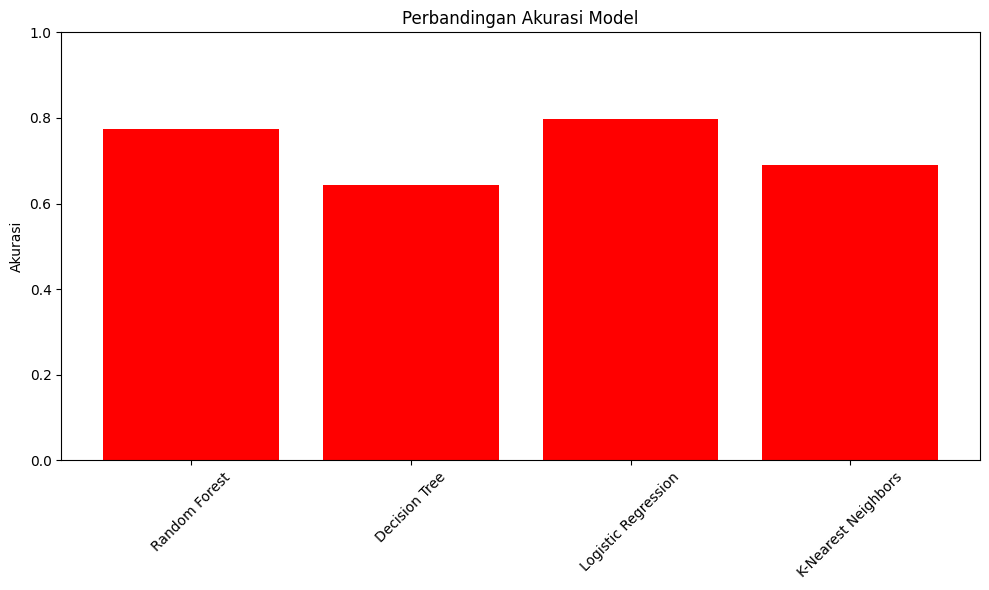

In [5]:
# 1. IMPORT LIBRARY
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 2. LOAD DATA
df = pd.read_csv("cirrhosis.csv")

# 3. DATA UNDERSTANDING
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())

# 4. PREPROCESSING
df = df.drop(columns=["ID"])  # Hapus kolom ID

# Imputasi nilai hilang
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Numerik: median
num_imputer = SimpleImputer(strategy="median")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Kategorikal: modus
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Encoding data kategorikal
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. PEMODELAN
X = df.drop(columns=["Status"])
y = df["Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model yang digunakan
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train dan evaluasi model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = acc

# 6. VISUALISASI AKURASI
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='red')
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()